In [1]:
!ls Data/Fitting

scan0062.dat


In [2]:
!cat Data/Fitting/scan0062.dat

# scan = 62
# date = 9/26/2017
# time = 2:02:59 AM
# proposal = 19281
# experiment = Structural phase transition in Ba0.67K0.33(Fe1-xCox)2As2
# experiment_number = 801
# command = th2th 0.8 -0.8 0.05
# builtin_command = scan s2 @(s2)+0.8 @(s2)+-0.8 0.050000 s1 @(s1)+(0.8/2) @(s1)+(-0.8/2) 0.025000
# users = Pengcheng Dai, Rui Zhang
# local_contact = Wei Tian
# scan_title = th2th scan of (0 0 2)24.526 K
# monochromator = PG002
# analyzer = Pg002
# sense = +-+
# collimation = 40-40-40-80
# samplename = Co and K doped 122 iron pnictides
# sampletype = crystal
# samplemosaic = 30.000000
# latticeconstants = 5.511155,5.511155,13.145240,90.000000,90.000000,90.000000
# ubmatrix = -0.005566,0.004313,0.076016,-0.181364,-0.000628,-0.002328,0.000496,-0.181398,0.001815
# mode = 0
# plane_normal = -0.023769,0.003463,0.999711
# ubconf = UB25Sep2017_84523PM.ini
# preset_type = normal 
# preset_channel = mcu
# preset_value = 5.000000
# def_x = s2
# def_y = detector
# col_headers = 
#   Pt.         s2 

In [3]:
# see https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.genfromtxt.html
import numpy as np
headers = "   Pt.         s2         s1       time   detector    monitor        mcu         m2        sgl        sgu        stl        stu   slita_bt   slita_lf   slita_rt   slita_tp         a1         a2          q          h          k          l         ei         ef          e    coldtip    tsample       temp"
# Note that by default, any consecutive whitespaces act as delimiter. 
data = np.genfromtxt('Data/Fitting/scan0062.dat', names=headers.split())
data

array([( 1., -19.9205, -8.1965, 4.882, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9195, 0.    ,  0., 1.9236, 14.6387, 14.6393, -0.0006, 24.004, 24.526, 24.),
       ( 2., -19.9717, -8.2211, 4.876, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9218, 0.    ,  0., 1.9285, 14.6387, 14.6393, -0.0006, 24.005, 24.527, 24.),
       ( 3., -20.0218, -8.2447, 4.878, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9241, 0.0001,  0., 1.9333, 14.6387, 14.6393, -0.0006, 23.998, 24.526, 24.),
       ( 4., -20.0691, -8.2703, 4.878, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554, 0.9263, 0.    ,  0., 1.9378, 14.6387, 14.6393, -0.0006, 23.994, 24.526, 24.),
       ( 5., -20.1222, -8.2949, 4.871, 0.000e+00, 132501., 5., 41.2563, 1.362, 0.1985, 0.0015, -0.001, 9., 7., 6., 12., 20.6276, 41.2554

# Plotting

Note in the metadata the default columns to plot

```
# def_x = s2
# def_y = detector
```

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,8)

Text(0.5,0,'$s_2$ (deg)')

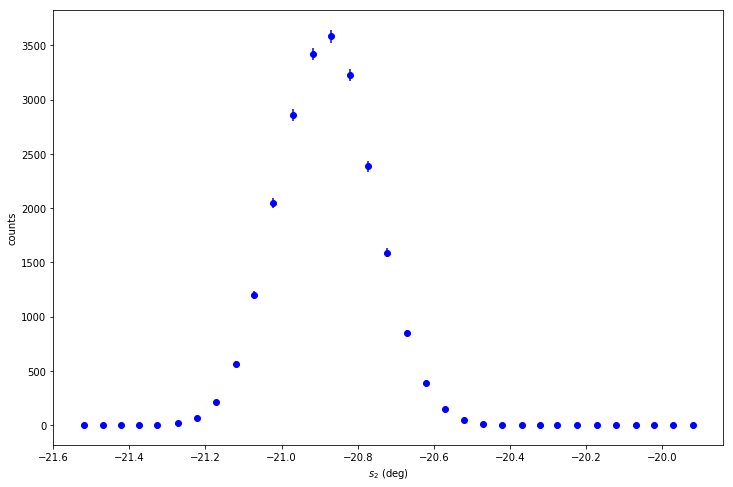

In [5]:
f,ax=plt.subplots()
data_x = data['s2']
data_y = data['detector']
data_err=np.sqrt(data_y)
ax.errorbar(data_x, data_y,yerr=(data_err),fmt='bo')
ax.set_ylabel('counts')
ax.set_xlabel('$s_2$ (deg)')

# Fitting


For fitting we will use the LMFIT package.

First we define a fuction.
Note the Python Syntax is

```def <function name> (<params>):
    '''
    <documentation string>
    '''
    <code>
    return <value>```

In [6]:
def gaussian(x, A, center, fwhm):
    '''
    Gaussian with fwhm and not sigma
    '''
    return A * np.exp(-4 * np.log(2) * (x - center)**2 / fwhm**2)

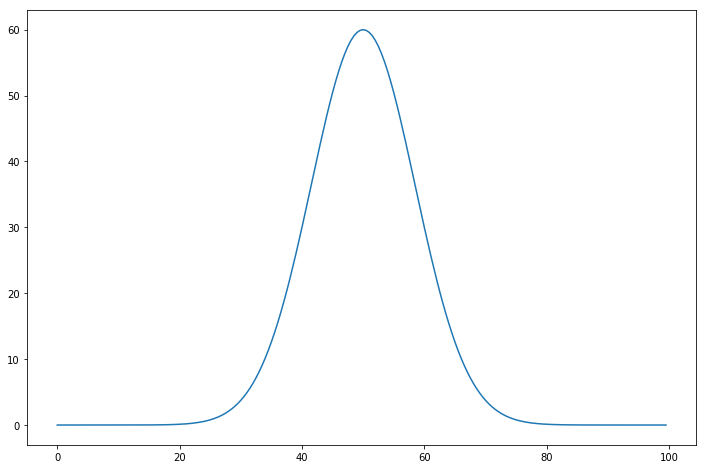

In [7]:
# Let's plot this function to see what it looks like
x = np.arange(0, 100, 0.5) # From 0 to 100 with 0.5 step
y = gaussian(x, 60, 50, 20)
plt.plot(x,y)

## LMFit

Non-Linear Least-Squares Minimization and Curve-Fitting

Very powerful that has many options. 

We will do a simple gaussian fit.

See: See: https://lmfit.github.io

In [8]:
from lmfit import Model
gmodel = Model(gaussian)

In [9]:
# Nice things
print(gmodel.param_names)
print(gmodel.independent_vars)

['A', 'center', 'fwhm']
['x']


In [10]:
# Fitting
result = gmodel.fit(data_y, x=data_x, A=3500, center=-20.9, fwhm=1,weights=1./(data_err)**2)
print(result.fit_report())

ValueError: The input contains nan values

Hmm Let's investigate what's wrong.

In [11]:
data_err

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        2.        ,  2.82842712,  6.92820323, 12.24744871, 19.77371993,
       29.17190429, 39.86226286, 48.84669897, 56.78908346, 59.87486952,
       58.48076607, 53.45091206, 45.21061822, 34.59768778, 23.79075451,
       14.59451952,  8.24621125,  3.87298335,  2.        ,  0.        ,
        1.        ,  0.        ,  0.        ])

note that there are zeros in the error so the weights (1/0) are nans


In [12]:
idxs=data_err>0

In [13]:
# Fitting try again
result = gmodel.fit(data_y[idxs], x=data_x[idxs], A=3500, center=-20.9, fwhm=1,weights=1./(data_err[idxs])**2)
print(result.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 75
    # data points      = 22
    # variables        = 3
    chi-square         = 2.450
    reduced chi-square = 0.129
    Akaike info crit   = -42.292
    Bayesian info crit = -39.019
[[Variables]]
    A:        3647.90299 +/- 457.4176 (12.54%) (init= 3500)
    center:  -20.8796223 +/- 0.004125 (0.02%) (init=-20.9)
    fwhm:     0.28510343 +/- 0.004779 (1.68%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(A, fwhm)                   = -0.761 



Text(0.5,0,'$s_2$ (deg.)')

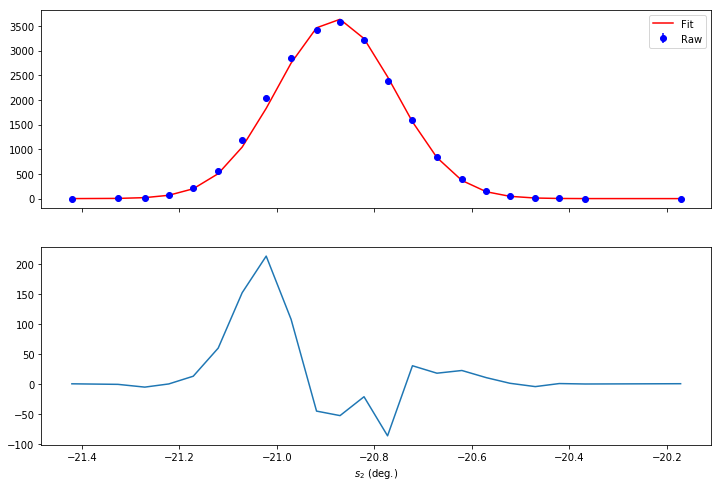

In [14]:
f2,ax2=plt.subplots(nrows=2,ncols=1,sharex=True)
ax2[0].errorbar(data_x[idxs],data_y[idxs],yerr=data_err[idxs],fmt='bo',label="Raw")
ax2[0].plot(data_x[idxs], result.best_fit, 'r-',label="Fit")
ax2[0].legend()
ax2[1].plot(data_x[idxs],data_y[idxs]-result.best_fit)
ax2[1].set_xlabel('$s_2$ (deg.)')

In [15]:
result.covar

array([[ 2.09230862e+05,  1.52128156e-02, -1.66445669e+00],
       [ 1.52128156e-02,  1.70195582e-05, -1.00339210e-06],
       [-1.66445669e+00, -1.00339210e-06,  2.28409371e-05]])